In [1]:
DATA_PATH = '../data/mexico_milk_prices.csv'

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set(style='whitegrid')

pd.options.display.max_columns = 200
pd.options.display.width = 120

def read_data(path):

    return pd.read_csv(path)


def basic_report(df):
    print('Dimensão:', df.shape)
    display(df.head())
    print('\nTipos e não-nulos por coluna:')
    display(pd.DataFrame(df.dtypes, columns=['dtype']))
    nulos = df.isnull().sum().to_frame(name='Contagem_nulos')
    nulos['Percentual_nulos (%)'] = (df.isnull().mean() * 100).round(2)
    print('\nNulos por coluna:')
    display(nulos)


def resumo_preco_por_categoria(df, var_cat, var_num='Precio'):

    resumo = (
        df.groupby(var_cat)[var_num]
        .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
        .sort_values(by='mean', ascending=False)
        .round(2)
    )
    return resumo

def plot_media_por_categoria(df, var_cat, var_num='Precio'):
    resumo = df.groupby(var_cat)[var_num].mean().sort_values()
    plt.figure(figsize=(8,5))
    sns.barplot(x=resumo.values, y=resumo.index, palette='viridis')
    plt.title(f"{var_num} médio por {var_cat}")
    plt.xlabel(f"Média de {var_num}")
    plt.ylabel(var_cat)
    plt.show()

def boxplot_preco_por_categoria(df, var_cat, var_num='Precio'):

    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=var_cat, y=var_num, palette='Set3')
    plt.title(f"Distribuição de {var_num} por {var_cat}")
    plt.xticks(rotation=45, ha='right')
    plt.show()

def resumo_estatistico(df):
    num_df = df.select_dtypes(include=[np.number])

    resumo = pd.DataFrame({
        'Contagem': num_df.count(),
        'Média': num_df.mean(),
        'Mediana': num_df.median(),
        'Moda': [num_df[col].mode().iloc[0] if not num_df[col].mode().empty else np.nan for col in num_df.columns],
        'Mínimo': num_df.min(),
        'Máximo': num_df.max(),
        'Amplitude': num_df.max() - num_df.min(),
        'Variância': num_df.var(),
        'Desvio_Padrão': num_df.std(),
        'Coef_Variação (%)': (num_df.std() / num_df.mean() * 100),
        'Assimetria': num_df.skew(),
        'Curtose': num_df.kurt()
    }).round(3)

    return resumo

def medidas_posicao(df):

    num_df = df.select_dtypes(include=[np.number])

    q = num_df.quantile([0, 0.25, 0.5, 0.75, 1]).T
    q.columns = ['Q0 (mín)', 'Q1 (25%)', 'Q2 (50%)', 'Q3 (75%)', 'Q4 (máx)']
    q['IQR (Q3-Q1)'] = q['Q3 (75%)'] - q['Q1 (25%)']
    return q.round(3)


def plot_distribuicoes(df):

    num_cols = df.select_dtypes(include=[np.number]).columns

    for col in num_cols:
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))

        # Histograma
        sns.histplot(df[col].dropna(), kde=True, ax=ax[0], color='teal')
        ax[0].set_title(f'Distribuição de {col}')

        # Boxplot
        sns.boxplot(x=df[col], ax=ax[1], color='orange')
        ax[1].set_title(f'Boxplot de {col}')

        plt.tight_layout()
        plt.show()

In [3]:
df = read_data(DATA_PATH)
print('Dados carregados com sucesso')
basic_report(df)

Dados carregados com sucesso
Dimensão: (52056, 6)


,Fecha,Estado,Ciudad,Tipo,Canal,Precio
0,2025-08-15,Aguascalientes,Aguascalientes,Pasteurizada,Tiendas,27.4
1,2025-08-15,Baja California,Mexicali,Pasteurizada,Tiendas,29.3
2,2025-08-15,Baja California,Tijuana,Pasteurizada,Tiendas,NaN
3,2025-08-15,Baja California Sur,La Paz,Pasteurizada,Tiendas,26.0
4,2025-08-15,Campeche,Campeche,Pasteurizada,Tiendas,NaN



Tipos e não-nulos por coluna:


,dtype
Fecha,object
Estado,object
Ciudad,object
Tipo,object
Canal,object
Precio,float64



Nulos por coluna:


,Contagem_nulos,Percentual_nulos (%)
Fecha,0,0.00
Estado,0,0.00
Ciudad,0,0.00
Tipo,0,0.00
Canal,0,0.00
Precio,6511,12.51


### Estatisticas descritivas - variavel numerica

In [4]:
resumo_estatistico(df)

,Contagem,Média,Mediana,Moda,Mínimo,Máximo,Amplitude,Variância,Desvio_Padrão,Coef_Variação (%),Assimetria,Curtose
Precio,45545,27.542,28.0,28.0,0.0,40.0,40.0,26.891,5.186,18.828,-2.997,14.422


In [5]:
display(medidas_posicao(df))

,Q0 (mín),Q1 (25%),Q2 (50%),Q3 (75%),Q4 (máx),IQR (Q3-Q1)
Precio,0.0,26.0,28.0,29.9,40.0,3.9


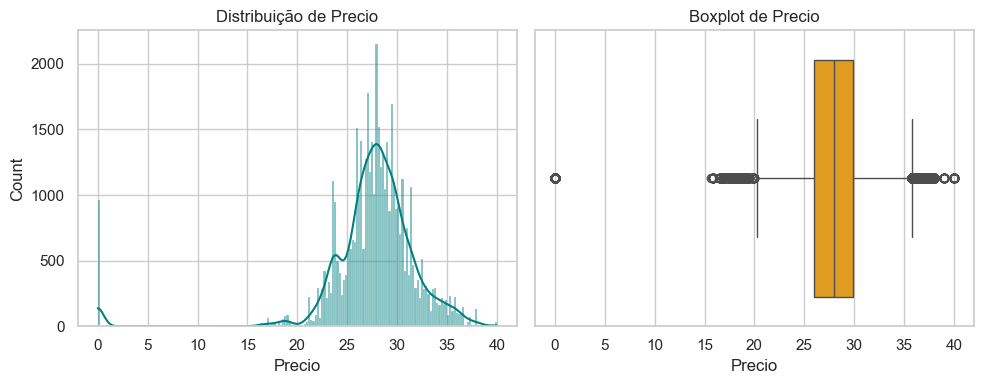

In [6]:
plot_distribuicoes(df)

### Estatisticas descritivas - variavel numerica por categoricas

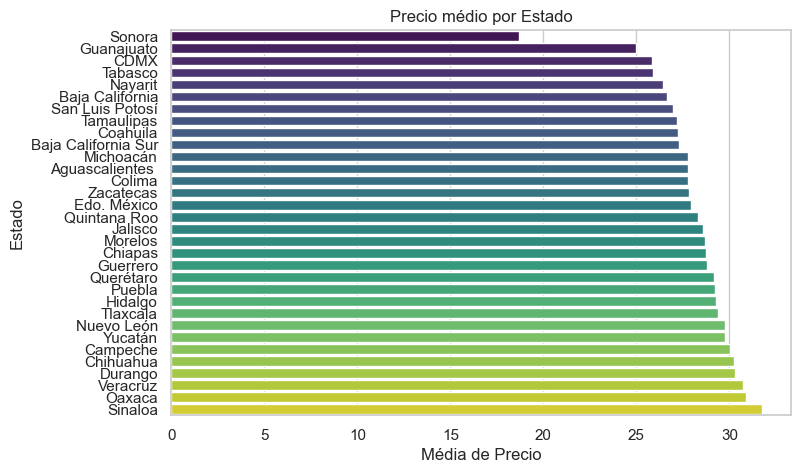

None

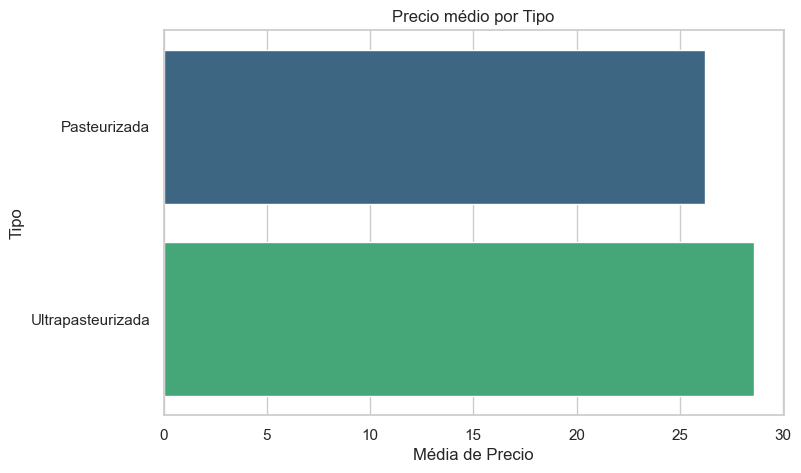

None

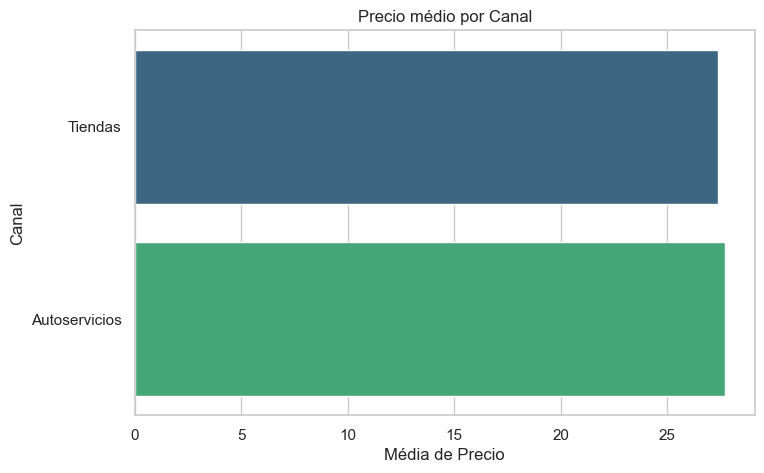

None

In [7]:
display(plot_media_por_categoria(df, 'Estado', 'Precio'))
display(plot_media_por_categoria(df, 'Tipo', 'Precio'))
display(plot_media_por_categoria(df, 'Canal', 'Precio'))

In [8]:
display(resumo_preco_por_categoria(df, 'Estado'))
display(resumo_preco_por_categoria(df, 'Tipo'))
display(resumo_preco_por_categoria(df, 'Canal'))

,count,mean,median,std,min,max
Estado,,,,,,
Sinaloa,964,31.73,31.39,2.80,25.30,37.33
Oaxaca,964,30.91,30.33,1.51,28.97,35.32
Veracruz,1446,30.70,30.63,2.95,24.75,36.35
Durango,1687,30.28,29.45,2.85,25.30,38.95
Chihuahua,1687,30.23,29.29,2.78,25.90,37.72
Campeche,482,30.05,29.07,2.14,27.00,35.40
Yucatán,482,29.77,29.25,1.97,25.45,34.97
Nuevo León,1928,29.75,29.48,3.28,24.33,40.00
Tlaxcala,964,29.39,28.88,3.02,25.25,36.00


,count,mean,median,std,min,max
Tipo,,,,,,
Ultrapasteurizada,25303,28.59,29.03,5.23,0.0,40.0
Pasteurizada,20242,26.23,27.00,4.82,0.0,35.3


,count,mean,median,std,min,max
Canal,,,,,,
Autoservicios,23134,27.72,28.10,5.21,0.0,37.9
Tiendas,22411,27.36,27.98,5.16,0.0,40.0


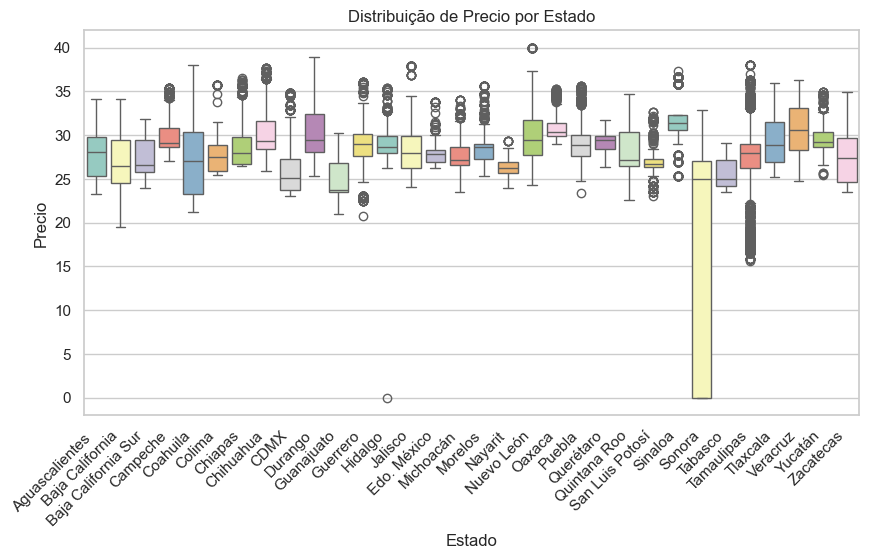

None

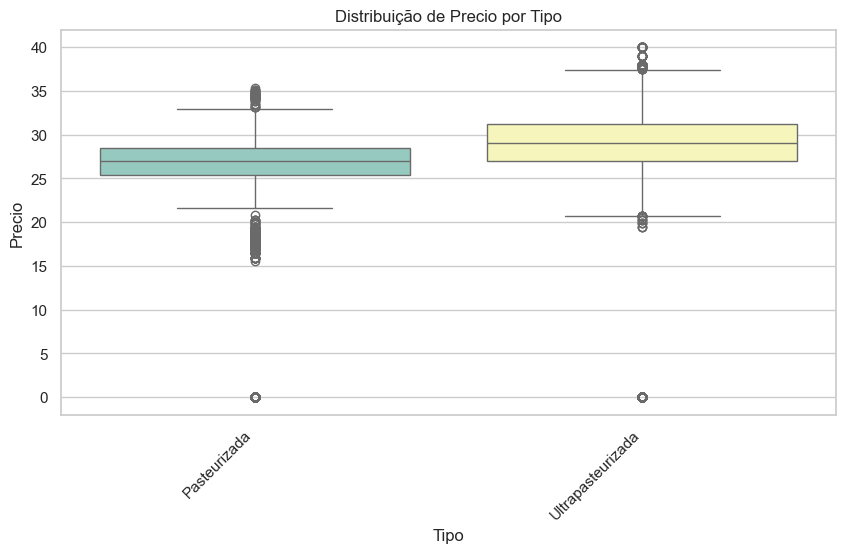

None

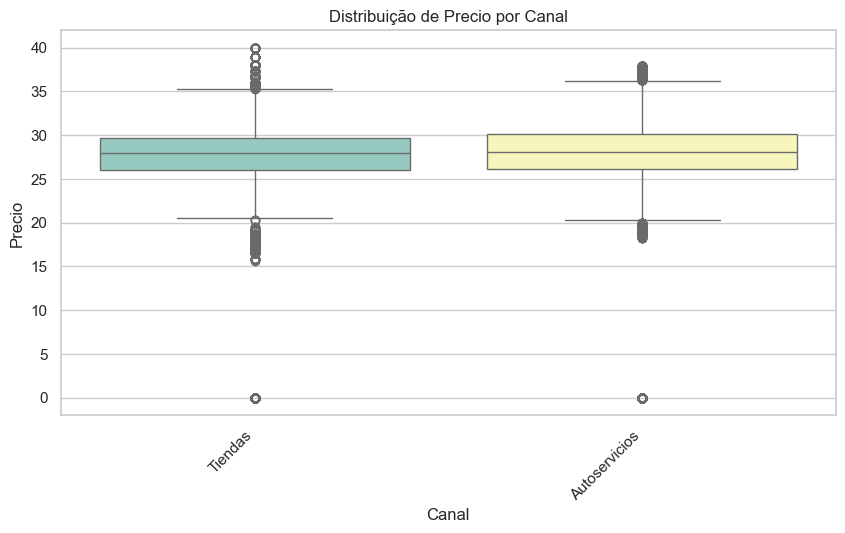

None

In [9]:
display(boxplot_preco_por_categoria(df, 'Estado', 'Precio'))
display(boxplot_preco_por_categoria(df, 'Tipo', 'Precio'))
display(boxplot_preco_por_categoria(df, 'Canal', 'Precio'))

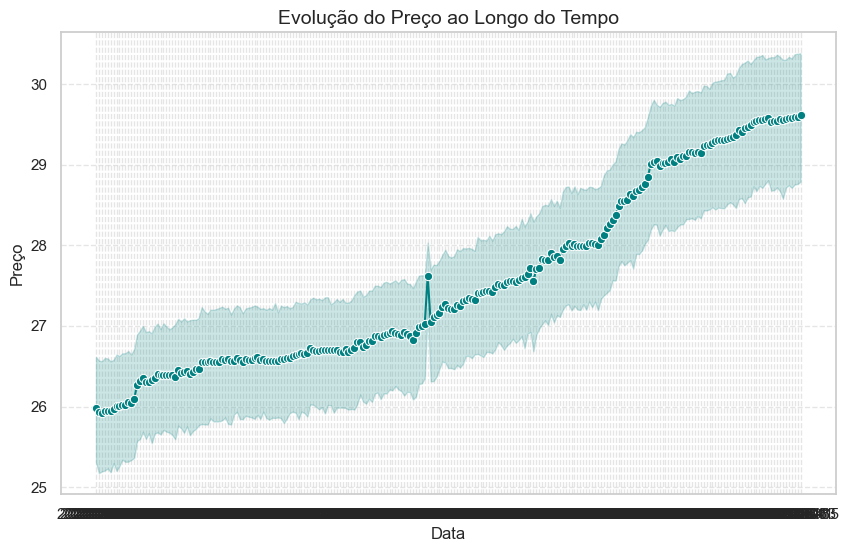

In [10]:
df = df.sort_values('Fecha')

# Cria o gráfico de linha
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Fecha', y='Precio', marker='o', color='teal')

plt.title('Evolução do Preço ao Longo do Tempo', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()